# Procesando datos en Python

### Instituto Data Science, Universidad del Desarrollo

* Prof. Diego Caro (dcaro en el dominio udd.cl).
* Prof. Eduardo Graells-Garrido (egraells en el dominio udd.cl).

https://twitter.com/diegocaro
https://twitter.com/carnby

https://github.com/diegocaro/tallerds


# La clase de hoy

![pandas](http://pandas.pydata.org/_static/pandas_logo.png)

* Introducción a Pandas para análisis de datos.
* Pandas es un módulo de Python para realizar análisis de datos http://pandas.pydata.org/


Esta presentación basada en el trabajo de Jake VanDerPlas https://github.com/jakevdp/PythonDataScienceHandbook. Bajo licencia CC0.

**Let the magic begins!**

In [0]:
import pandas as pd

# Dataframes

* Es una tabla (si, como las de Excel), compuesta por varias columnas. Las columnas también se llaman series.

In [3]:
city = pd.Series(['California','Texas','New York', 'Florida','Alabama'])
area = pd.Series([423967, 695662, 141297,170312, 149995])
pop = pd.Series([38332521, 26448193, 19651127, 19552860, 12882135])

df = pd.DataFrame({'city':city, 'area':area, 'pop':pop})
df

,area,city,pop
0,423967,California,38332521
1,695662,Texas,26448193
2,141297,New York,19651127
3,170312,Florida,19552860
4,149995,Alabama,12882135


* Las columnas se pueden seleccionar con el operador corchete.

In [6]:
type(df['area']) 

pandas.core.series.Series

In [4]:
df['area'] # y también con data.area

0    423967
1    695662
2    141297
3    170312
4    149995
Name: area, dtype: int64

* Y como cada columna es una Serie... podemos realizar operaciones de Series!

In [5]:
df['area'] / 1000

0    423.967
1    695.662
2    141.297
3    170.312
4    149.995
Name: area, dtype: float64

# Consultando datos en un Dataframe

In [7]:
df.head(3)

,area,city,pop
0,423967,California,38332521
1,695662,Texas,26448193
2,141297,New York,19651127


In [8]:
df.tail(3)

,area,city,pop
2,141297,New York,19651127
3,170312,Florida,19552860
4,149995,Alabama,12882135


* Podemos usar el operador loc[] para recuperar una fila:

In [9]:
df.loc[2]

area      141297
city    New York
pop     19651127
Name: 2, dtype: object

# Manipulando columnas

* Agregar una columna:

In [10]:
# puedes asignar nuevas columnas
df['density'] = df['pop'] / df['area'] # osom, no?
df

,area,city,pop,density
0,423967,California,38332521,90.413926
1,695662,Texas,26448193,38.018740
2,141297,New York,19651127,139.076746
3,170312,Florida,19552860,114.806121
4,149995,Alabama,12882135,85.883763


* Y borrar columnas:

In [10]:
copy_data = df.drop(['area'], axis='columns')
copy_data

,city,pop,density
0,California,38332521,90.413926
1,Texas,26448193,38.018740
2,New York,19651127,139.076746
3,Florida,19552860,114.806121
4,NaN,12882135,85.883763


## Cargando y filtrando datos

* Pandas también puede abrir varios tipos de archivo, nosotros usaremos CSV.
* Más info sobre otro formatos (excel, json, xml...) https://pandas.pydata.org/pandas-docs/stable/io.html 

In [11]:
!mkdir clase04
!cd clase04 && wget -O gini_by_country.csv https://github.com/diegocaro/tallerds/raw/master/clases/clase04/gini_by_country.csv

mkdir: cannot create directory ‘clase04’: File exists
--2018-04-05 18:57:36--  https://github.com/diegocaro/tallerds/raw/master/clases/clase04/gini_by_country.csv
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/diegocaro/tallerds/master/clases/clase04/gini_by_country.csv [following]
--2018-04-05 18:57:36--  https://raw.githubusercontent.com/diegocaro/tallerds/master/clases/clase04/gini_by_country.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 651 [text/plain]
Saving to: ‘gini_by_country.csv’

gini_by_country.csv 100%[===================>]     651  --.-KB/s    in 0s      

2018-04-05 18:57:36 (60.6 MB/s) - ‘gini

In [12]:
df = pd.read_csv('clase04/gini_by_country.csv')
df.head()

,country,gini
0,Slovenia,0.251
1,Denmark,0.256
2,Slovak Republic,0.247
3,Czech Republic,0.257
4,Iceland,0.246


* Se pueden recuperar filas que cumple condiciones sobre las columnas:
* Ejemplo: ¿Cuáles son los paises con gini menor a 0.25?

In [16]:
df[df.gini < 0.25] # los paises con menos desigualdad

,country,gini
2,Slovak Republic,0.247
4,Iceland,0.246


In [17]:
menos_desiguales = df[df.gini < 0.25]
menos_desiguales

,country,gini
2,Slovak Republic,0.247
4,Iceland,0.246


In [19]:
type(menos_desiguales)

pandas.core.frame.DataFrame

Las condiciones se pueden mezclar con el operador or, and y not. Siempre debes **usar paréntesis para agrupar las condiciones!**

| Operación | Python (`if`) | Pandas |
|-----------|--------------|-----------|
| Disyunción | or | &#124; |
| Conjunción | and | & |
| Negación | not | ~ |

Pregunta: ¿ Cuáles son los países con Gini menos a 0.25 y mayores a 0.5?

In [21]:
mivar = df[(df.gini < 0.25) | (df.gini > 0.5)] # debes agrupar condiciones con paréntesis
mivar

,country,gini
2,Slovak Republic,0.247
4,Iceland,0.246
38,China (People's Republic of),0.556
41,South Africa,0.620


¿Y cuales están entre 0.25 y 0.5?

In [22]:
noextremos = df[(df.gini > 0.25) & (df.gini < 0.5)]
noextremos.head()

,country,gini
0,Slovenia,0.251
1,Denmark,0.256
3,Czech Republic,0.257
5,Norway,0.257
6,Finland,0.257


* Pregunta: ¿Cuántos países están en los extremos?

In [23]:
noextremos.shape # (num. filas, num. columnas)

(38, 2)

In [18]:
noextremos

,country,gini
0,Slovenia,0.251
1,Denmark,0.256
3,Czech Republic,0.257
5,Norway,0.257
6,Finland,0.257
7,Belgium,0.266
8,Austria,0.274
9,Germany,0.289
10,Hungary,0.288
11,Poland,0.298


# Operaciones sobre Dataframes
Pandas incorpora operaciones estadísticas básicas. Ver vás en https://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics 

In [24]:
!wget -O clase04/gini_by_year_clean.csv https://github.com/diegocaro/tallerds/raw/master/clases/clase04/gini_by_year_clean.csv

--2018-04-05 19:05:41--  https://github.com/diegocaro/tallerds/raw/master/clases/clase04/gini_by_year_clean.csv
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/diegocaro/tallerds/master/clases/clase04/gini_by_year_clean.csv [following]
--2018-04-05 19:05:41--  https://raw.githubusercontent.com/diegocaro/tallerds/master/clases/clase04/gini_by_year_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31120 (30K) [text/plain]
Saving to: ‘clase04/gini_by_year_clean.csv’

clase04/gini_by_yea 100%[===================>]  30.39K  --.-KB/s    in 0.01s   

2018-04-05 19:05:41 (1.98 MB/s) - ‘clase04/gini_by_year_clean.csv

In [25]:
df = pd.read_csv('clase04/gini_by_year_clean.csv')
df.head(2)

,country,year,gini
0,Australia,1981,0.3133
1,Brazil,1981,0.5793


In [23]:
df.describe()

,year,gini
count,1268.000000,1268.000000
mean,2003.068612,0.398323
std,7.611265,0.100327
min,1981.000000,0.162300
25%,1998.000000,0.317175
50%,2005.000000,0.384250
75%,2009.000000,0.475250
max,2014.000000,0.657600


In [28]:
df[df['country'] == "Chile"]

,country,year,gini
42,Chile,1987,0.5621
96,Chile,1990,0.5725
128,Chile,1992,0.5481
181,Chile,1994,0.5643
234,Chile,1996,0.5487
293,Chile,1998,0.5552
368,Chile,2000,0.5559
507,Chile,2003,0.5461
699,Chile,2006,0.5179
916,Chile,2009,0.5200


## Ordenar

In [26]:
df_sorted = df.sort_values('gini',ascending=False) # o puede ser ascending=True
df_sorted.head()

,country,year,gini
277,Malawi,1997,0.6576
759,South Africa,2006,0.6479
451,Botswana,2002,0.6473
1127,South Africa,2011,0.6338
523,Namibia,2003,0.6332


## Contar

In [27]:
df['country'].value_counts() #retorna el numero de filas por 'country'

Brazil                 30
Costa Rica             28
Honduras               26
Argentina              26
Uruguay                22
Poland                 22
Panama                 21
Moldova                20
Belarus                20
Peru                   20
El Salvador            20
Ukraine                19
Georgia                19
Russian Federation     19
Romania                19
Colombia               19
Thailand               19
Dominican Republic     19
Lithuania              18
Kyrgyz Republic        18
Hungary                18
Paraguay               18
Ecuador                18
Estonia                17
Bolivia                17
Latvia                 17
Kazakhstan             16
Armenia                16
Mexico                 15
Slovenia               14
                       ..
Chad                    2
Angola                  2
Papua New Guinea        2
Sierra Leone            2
Namibia                 2
Benin                   2
China                   2
Congo, Rep. 

## Visualizar datos

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

¿Cuántas observaciones de coeficiente de Gini hay por año?

In [33]:
yearcount = df['year'].value_counts()

yearcount.head()

2010    76
2009    76
2005    74
2012    72
2011    72
Name: year, dtype: int64

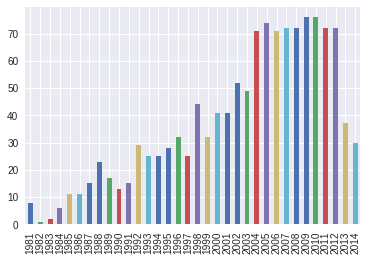

In [35]:
yearcount.sort_index().plot(kind='bar');

¿Cuál es la variación del Coef. de Gini de Chile por año?

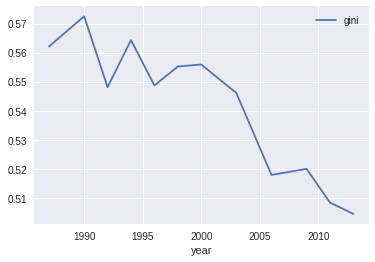

In [36]:
df[df.country=='Chile'].plot(x='year',y='gini');

**Pregunta**: ¿Se te ocurre algo que se pueda mejorar de este gráfico?

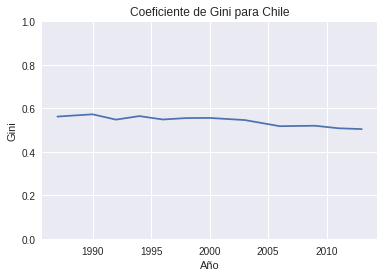

In [37]:
df[df.country=='Chile'].plot(x='year', y='gini', title='Coeficiente de Gini para Chile', legend=False);
plt.ylabel('Gini')
plt.xlabel('Año')
plt.ylim(0,1);

# 🎉🎉🎉

# Extra
## Series

* Una serie es una colección de valores.

In [0]:
pd.Series(['Santiago', 'Concepción', 'Valparaíso'])

0      Santiago
1    Concepción
2    Valparaíso
dtype: object

* Están compuestos por un índice y valores

In [0]:
s = pd.Series([0.25, 0.5, 0.75, 1.0])
s

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [0]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [0]:
s.values

array([ 0.25,  0.5 ,  0.75,  1.  ])

# Operaciones sobre Series

* Operaciones aritméticas a cada elemento de la serie (como un vector de matlab)
    * Suma, resta, división, etc... 
    * Más info en https://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [0]:
s + 50 # suma 50 a cada valor de la serie

0    50.25
1    50.50
2    50.75
3    51.00
dtype: float64

In [0]:
s * 3.1416

0    0.7854
1    1.5708
2    2.3562
3    3.1416
dtype: float64

* También podemos realizar operaciones entre dos series (deben ser del mismo tamaño)

In [0]:
h = pd.Series([-100, -99, -98, -97])
h

0   -100
1    -99
2    -98
3    -97
dtype: int64

In [0]:
s + h

0   -99.75
1   -98.50
2   -97.25
3   -96.00
dtype: float64

* Y también se pueden realizar operaciones sobre todos los valores

In [0]:
s.sum() 

2.5

In [0]:
s.mean() 

0.625

In [0]:
s.std() 

0.3227486121839514

# Consultando series

* Podemos recuperar elementos de la serie indicando su posición (recuperar el i-ésimo elemento)

In [0]:
s = pd.Series([0.25, 0.5, 0.75, 1.0])

In [0]:
s.loc[2] #recupera el segundo elemento de s

0.75

In [0]:
s.loc[2:3] # recupera un rango de elementos

2    0.75
3    1.00
dtype: float64

* Y también podemos seleccionar por alguna condición sobre los valores

In [0]:
s[s > 0.4] # puede usar cualquier operador de comparación

1    0.50
2    0.75
3    1.00
dtype: float64

* El operador de comparación devuelve una serie de True/False
    * Todas las posiciones que son True se seleccionan

In [0]:
s > 0.4

0    False
1     True
2     True
3     True
dtype: bool